# 1. Import data set exported in Task 4.9 

In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define Path

path = r'C:\Users\dolson\OneDrive - BEACON TECHNOLOGIES\Desktop\Instacart Basket Analysis 10.2022'

In [3]:
# Import latest version of merged dataset

df_final_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

In [4]:
df_final_data.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_final_data.shape

(32404859, 32)

# 2. Consider any security implications in data.  address PII data before continuing with analysis

In [6]:
# Check columns to identify PII** First and Last Names are a common source 

df_final_data.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_previous_order',
       'Frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

In [7]:
# Drop first and last name columns for privacy 
df_final_data.drop(columns = {'first_name'}, inplace = True)

In [8]:
# Drop last name column
df_final_data.drop(columns = {'last_name'}, inplace = True)

In [9]:
# Check output after dropping columns
df_final_data.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,spending_flag,median_days_since_previous_order,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

3.1 Use the region information in Wikipedia article to create column.  

In [10]:
# Create a "Region" coloumn based on "State" column
        
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [11]:
# Create regional flag 

df_final_data.loc[df_final_data['state'].isin(Northeast), 'region']='Northeast'
df_final_data.loc[df_final_data['state'].isin(Midwest), 'region']='Midwest'
df_final_data.loc[df_final_data['state'].isin(South), 'region']='South'
df_final_data.loc[df_final_data['state'].isin(West), 'region']='West'

In [12]:
# Check if row size correct - Yes it is 
df_final_data['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

3.2 Determine spending habits between U.S. regions (Hint: You can do this by crossing the varialbe you just creaetd with the spending flag.)

In [13]:
#Creating a crosstab to compare region and spending flag
crosstab = pd.crosstab(df_final_data['region'], df_final_data['spending_flag'], dropna = False)                       

In [14]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


In [15]:
# Additional checks for cross tab ## can omit 
# Number of states per region
df_final_data.groupby('region')['state'].nunique()


region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [16]:
# Additonal checks for cross tab ## can omit
# Number of customers by region

df_final_data.groupby('region')['user_id'].nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

South region has the most spenders for both the high and low categories.  The south region does have more states and then inclined to have more customers

# 4.  The instacart CFO is not interested in cusotmers who don't generate much revenue for app.  Create an exclusion flag for low-activity customers (< 5 orders), exclude from data. Export this sample 


In [17]:
# Creating an exclusion flag for less than 5 orders
df_final_data.loc[df_final_data['max_order'] < 5, 'activity'] = 'Low Activity'
df_final_data.loc[df_final_data['max_order'] >= 5, 'activity'] = 'Active'

In [18]:
# Check column frequency
df_final_data['activity'].value_counts(dropna = False)

Active          30964564
Low Activity     1440295
Name: activity, dtype: int64

In [19]:
# Check column length

len(df_final_data['activity'])

32404859

In [20]:
# Exclude low Activity from data. 
#Export this sample dataframe as low_activity_customers.pkl (1440295)

df_low_activity = df_final_data[df_final_data['activity']== 'Low Activity']

In [21]:
len(df_low_activity['activity'])

1440295

In [22]:
df_low_activity.shape

(1440295, 32)

In [23]:
df_low_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,Frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
1510,520620,120,1,3,11,NaN,True,196.0,2,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1511,3273029,120,3,2,8,19.0,False,196.0,2,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1512,520620,120,1,3,11,NaN,True,46144.0,1,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1513,3273029,120,3,2,8,19.0,False,46144.0,1,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity
1514,520620,120,1,3,11,NaN,True,26352.0,3,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low Activity


In [24]:
#Export df_low_activity to low_activity_customers
df_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

In [25]:
# Create dataframe for 'Active' activity
df_active = df_final_data[df_final_data['activity']== 'Active']

In [26]:
# check Active shape 
df_active.shape

(30964564, 32)

In [27]:
# Confirm Active and Low Activity dataframes match orig df_final_data
len(df_low_activity) + len(df_active)

32404859

In [28]:
# Delete df_low_activity and df_final_data (original)dataframes to
# reduce memory usage will be working with df_active
del df_low_activity

In [29]:
len(df_final_data)

32404859

In [30]:
del df_final_data

In [31]:
len(df_active)

30964564

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

# 6. Create an appropriate visualization to show the  distribution of profiles.

# 7. Aggregate max, mean, min variables on a customer-profile level for usage frequency and expenditure.






In [32]:
# Creating column flag for age

df_active.loc[df_active['age']<=25, 'age_group']='Young Adult'
df_active.loc[(df_active['age']<65)&(df_active['age']>25), 'age_group']='Adult'
df_active.loc[df_active['age']>=65, 'age_group']='Senior'

In [33]:
# Check for new column value counts
df_active['age_group'].value_counts()

Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [34]:
# Aggreagate by age group expenditure 
df_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})                        


prices           
                 mean  min   max
age_group                       
Adult        7.789062  1.0  25.0
Senior       7.796875  1.0  25.0
Young Adult  7.785156  1.0  25.0

[Text(0, 0, 'Adult'), Text(1, 0, 'Senior'), Text(2, 0, 'Young Adult')]

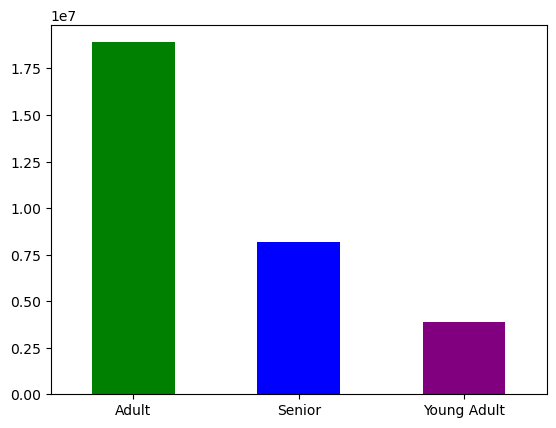

In [82]:
# Age group visualization 
bar=df_active['age_group'].value_counts().plot.bar (color = ['green','blue','purple'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=0)

In [83]:
# Export Age group bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [37]:
df_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity,age_group
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,Adult
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,Adult
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,Adult
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,Adult
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Active,Adult


In [38]:
df_active.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_previous_order',
       'Frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', 'region', 'activity',
       'age_group'],
      dtype='object')

In [39]:
#Aggregating for age group order frequency
df_active.groupby('age_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                        mean  min   max
age_group                                              
Adult                               9.968750  0.0  30.0
Senior                              9.929688  0.0  30.0
Young Adult                         9.937500  0.0  30.0

### Income Profile



In [40]:
#Creating income flags: < $40,000- low income, > $40,000 & or = < $150,000-middle income, < $150,000- high income
df_active.loc[df_active['income']<40000, 'income_group']='low income'
df_active.loc[(df_active['income']>=40000)&(df_active['income']<150000), 'income_group']='middle income'
df_active.loc[df_active['income']>150000, 'income_group']='high income'

In [41]:
# Check new column value counts 
df_active['income_group'].value_counts(dropna=False) 

middle income    25457264
high income       3894534
low income        1612025
NaN                   741
Name: income_group, dtype: int64

In [42]:
#Aggregating for income bracket expenditure
df_active.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
high income    7.941406  1.0  25.0
low income     6.503906  1.0  25.0
middle income  7.847656  1.0  25.0

In [43]:
#Aggregating for income bracket order frequency
df_active.groupby('income_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                          mean  min   max
income_group                                             
high income                           9.789062  0.0  30.0
low income                           10.648438  0.0  30.0
middle income                         9.937500  0.0  30.0

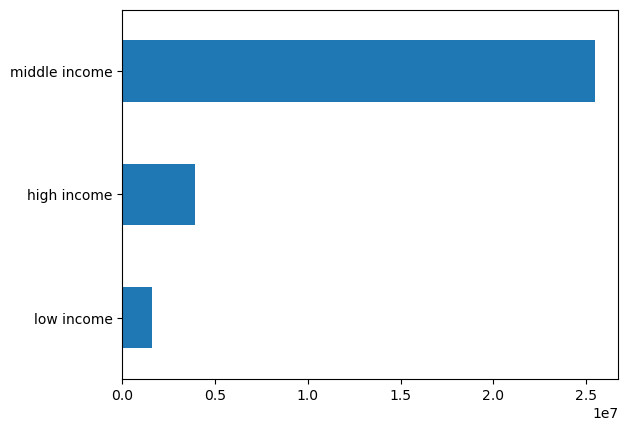

In [44]:
# Income profile visualization horizontal
bar2 = df_active['income_group'].value_counts().sort_values().plot.barh()

In [45]:
# Export Bar Chart 
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

### Number of Dependents Profile 

In [46]:
#Creating dependents flag: no_of_dependents > 0 - has dependents, otherwise - no dependents
df_active.loc[df_active['no_of_dependants']>0, 'dependant_group']='has dependants'
df_active.loc[df_active['no_of_dependants']==0,'dependant_group']='no dependants'

In [47]:
# Check coloumn counts
df_active['dependant_group'].value_counts(dropna=False)

has dependants    23224883
no dependants      7739681
Name: dependant_group, dtype: int64

In [48]:
#Aggregating for dependants bracket expenditure
df_active.groupby('dependant_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                     mean  min   max
dependant_group                     
has dependants   7.789062  1.0  25.0
no dependants    7.789062  1.0  25.0

In [49]:
#Aggregating for dependents bracket order frequency
df_active.groupby('dependant_group').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                            mean  min   max
dependant_group                                            
has dependants                          9.960938  0.0  30.0
no dependants                           9.937500  0.0  30.0

### Department ID profile 

In [50]:
# Import departments_wrangled dataframe 
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [51]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [52]:
# Rename unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [53]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [54]:
# Turn df_dept into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [55]:
# Mapping department names to department_id in dataframe
df_active['department'] = df_active['department_id'].map(data_dict)

In [56]:
df_active.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,no_of_dependants,marital_status,income,region,activity,age_group,income_group,dependant_group,department
0,2539329,1,1,2,8,NaN,True,196.0,1,0,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
1,2398795,1,2,3,7,15.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
2,473747,1,3,3,12,21.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
3,2254736,1,4,4,7,29.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages
4,431534,1,5,4,15,28.0,False,196.0,1,1,...,2/17/2019,3,married,40423,South,Active,Adult,middle income,has dependants,beverages


In [57]:
# Check columns
df_active.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_previous_order',
       'Frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'no_of_dependants', 'marital_status', 'income', 'region', 'activity',
       'age_group', 'income_group', 'dependant_group', 'department'],
      dtype='object')

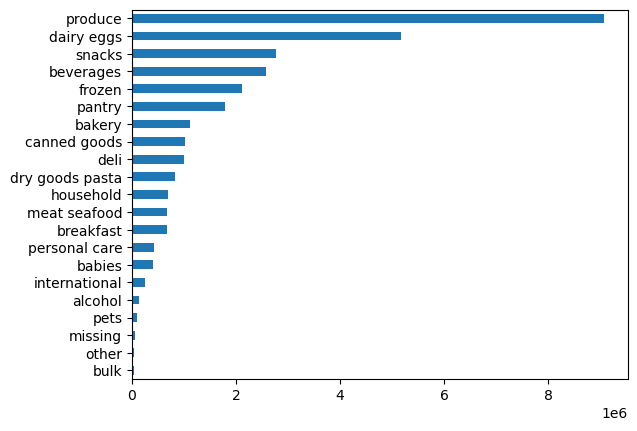

In [58]:
# Department value counts 
Bar_valuecounts =df_active.department.value_counts().sort_values().plot.barh()

In [59]:
# Export Bar_valuecounts 
Bar_valuecounts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_value_counts.png'))

### Divide department profiles into categories under baby status, pet status and alcohol status

### Baby status

In [60]:
# Creating a baby flag: baby supplies (1 / didn't buy baby supplies (0). 
df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status'] = df_active.groupby(['user_id'])['baby_status'].transform(np.max)

In [61]:
# Check column
df_active['baby_status'].value_counts(dropna=False)

0    21154311
1     9810253
Name: baby_status, dtype: int64

In [62]:
# Aggregating for baby_status prices
df_active.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
baby_status                     
0            7.769531  1.0  25.0
1            7.832031  1.0  25.0

In [63]:
# Aggregating for baby_status  order frequency
df_active.groupby('baby_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                        mean  min   max
baby_status                                            
0                                  10.734375  0.0  30.0
1                                   8.289062  0.0  30.0

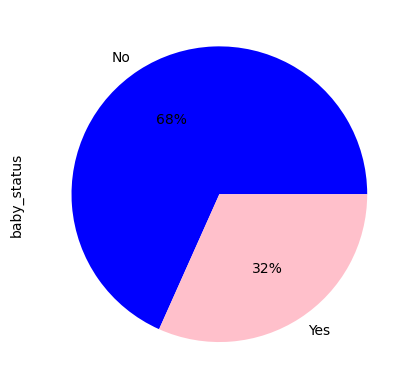

In [64]:
# Baby Status Visualization 
pie1 = df_active['baby_status'].value_counts().plot.pie(labels= ['No', 'Yes'],autopct=('%1.f%%'), colors=['blue','pink']) 

In [65]:
# Export pie chart
pie1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_baby_status.png'))

### Pet Status

In [66]:
# Create pet flag
df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
df_active['pet_status']=df_active.groupby(['user_id'])['pet_status'].transform(np.max)

In [67]:
# Check column 
df_active['pet_status'].value_counts(dropna=False)

0    27513213
1     3451351
Name: pet_status, dtype: int64

In [68]:
# Aggregating for pet_status prices 
df_active.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
pet_status                     
0           7.789062  1.0  25.0
1           7.812500  1.0  25.0

In [69]:
# Aggregating for pet_status order frequency 
df_active.groupby('pet_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                       mean  min   max
pet_status                                            
0                                 10.054688  0.0  30.0
1                                  9.195312  0.0  30.0

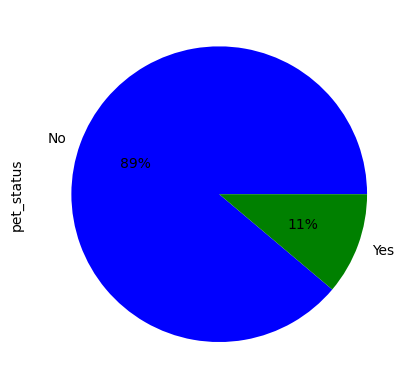

In [70]:
# Pet Status Visualization
pie2 = df_active['pet_status'].value_counts().plot.pie(labels=['No- Not purchased pet supplies', 'Yes - Has purchased pet supplies'], autopct=('%1.f%%'), colors=['blue','green'])

In [71]:
# Export Pet Status Pie Chart
pie2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_pet_status.png'))

### Alcohol status

In [72]:
# Create alcohol flag
df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status'] = df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [73]:
# Check column
df_active['alcohol_status'].value_counts(dropna=False)

0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [74]:
# Aggregating for alcohol_status prices 
df_active.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
alcohol_status                     
0               7.792969  1.0  25.0
1               7.781250  1.0  25.0

In [75]:
# Aggregating for alcohol_status order frequency 
df_active.groupby('alcohol_status').agg({'median_days_since_previous_order': ['mean', 'min', 'max']})

median_days_since_previous_order           
                                           mean  min   max
alcohol_status                                            
0                                      9.976562  0.0  30.0
1                                      9.710938  0.0  30.0

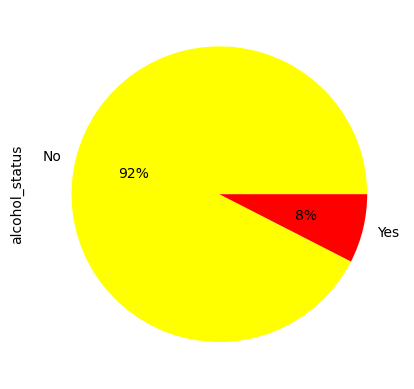

In [76]:
# Alcohol status visualization
pie3 = df_active['alcohol_status'].value_counts().plot.pie(labels=['No - Has not purchased alcohol', 'Yes - has purchased alcohol'], autopct=('%1.f%%'), colors=['yellow','red'])

In [77]:
# Export alcohol status pie chart
pie3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_alcohol_status.png'))

## 8. Compare your customer profiles with regions and departments

In [78]:
# Creating crosstab for region and age group
age_region = pd.crosstab(df_active['region'], df_actve['age_group'], dropna = False)


In [ ]:
# Creating crosstab to display labels
age_region_labels = pd.crosstab(index=df_unique['region'],columns)

In [114]:
# check crosstab
age_region

age_group,Adult,Senior,Young Adult
region,,,
Midwest,4459312,1904046,898155
Northeast,3299969,1484807,679909
South,6287689,2708461,1314989
West,4857532,2098230,971465


In [ ]:
#Creating stacked bar chart for age_region distribution
age_region_dist=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['gold','skyblue','yellowgreen'], 
                        figsize=(12,10))

plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=14)

plt.show()

[Text(0, 0, 'Midwest'),
 Text(1, 0, 'Northeast'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

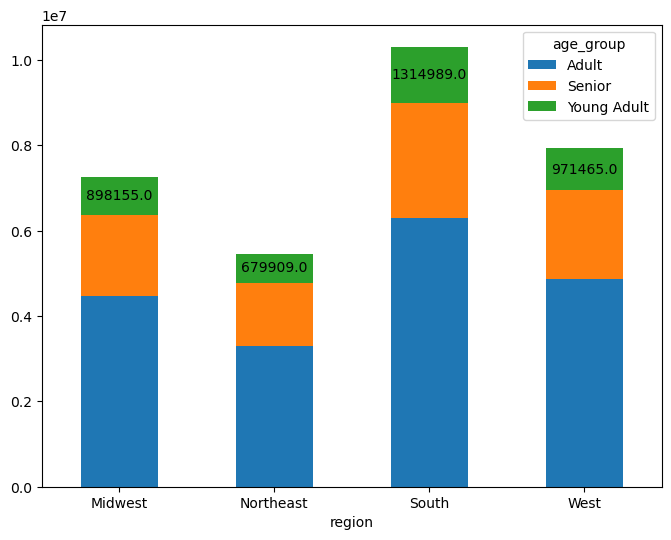

In [122]:
# Age Region Bar Chart
#bar3 = age_region.plot(kind='bar', stacked =True, figsize = (8,6), rot=0,
                      xlabel = 'region')
#for a  in bar3.containers:
# labels = [v.get_height() if v.get_height() > 0 else '' for v in a ]
#bar3.bar_label(a,fmt='%.1f%%', labels=labels, label_type='center')
                
#bar3.set_xticklabels(bar3.get_xticklabels(), rotation=0)


In [ ]:
# Export bar 
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region.png'))

In [ ]:
# Creating crosstab for region and income
region_income = pd.crosstab(df_active['region'], df_active['income_group'], dropna = False)

In [ ]:
# Check crosstab 
region_income

In [ ]:
# Income region bar chart
bar4 = region_income.plot(kind='bar', stacked =True)

In [ ]:
# Export bar 
bar4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region.png'))

In [ ]:
# Creating crosstab for region and department
region_dep = pd.crosstab(df_active['department'], df_active['region'], dropna = False)

In [ ]:
# check crosstab
region_dep

In [ ]:
# Region Department Bar Chart
bar5 = region_dep.plot.barh(stacked =True)

In [ ]:
# Exporting bar chart
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_department.png'))

In [ ]:
# Creating crosstab for region and department
region_pricerange = pd.crosstab(df_active['region'], df_active['price_range_loc'], dropna = False)

In [ ]:
# check crosstab
region_pricerange

In [ ]:
# Region Price Range Bar Chart
bar6 = region_pricerange.plot(kind='bar', stacked =True)

In [ ]:
# Exporting bar chart
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_pricerange.png'))

In [ ]:
pie4 = df_active['price_range_loc'].value_counts().plot.pie(autopct=('%1.f%%'))

In [ ]:
# Exporting pie chart
pie4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range_loc.png'))

In [ ]:
# Creating crosstab for income and frequency
income_freq = pd.crosstab(df_active['income_group'], df_active['Frequency_flag'], dropna = False)

In [ ]:
# Check crosstab
income_freq

In [ ]:
# Income Group and Order frequency Bar Chart
bar7 = income_freq.plot(kind='bar', stacked =True)

In [ ]:
# Exporting bar chart
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_frequency.png'))

In [ ]:
# Creating crosstab for age and frequency
age_freq = pd.crosstab(df_active['age_group'], df_active['Frequency_flag'], dropna = False)

In [ ]:
# Check crosstab
age_freq

In [ ]:
# Region Price Range Bar Chart
bar8 = age_freq.plot(kind='bar', stacked =True)

In [ ]:
# Exporting bar chart
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

In [ ]:
# Creating crosstab for age and frequency
marital_freq = pd.crosstab(df_active['marital_status'], df_active['Frequency_flag'], dropna = False)

In [ ]:
# Checking crosstab
marital_freq

In [ ]:
# Region Price Range Bar Chart
bar9 = marital_freq.plot(kind='bar', stacked =True)

In [ ]:
# Exporting bar chart
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_freq.png'))

In [ ]:
# Create crosstab for department and order frequency 
dep_freq = pd.crosstab(df_active['department'], df_active['Frequency_flag'], dropna = False)

In [ ]:
bar_depfreq = dep_freq.plot.barh(stacked =True)


In [ ]:
# Exporting bar chart
bar_depfreq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_freq.png'))

In [ ]:
# Export df_active as final_dataset

df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))
